In [ ]:
# 로딩

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier,plot_importance
import seaborn as sns
import pylab as pl
from scipy.stats import mode
                      
test = pd.read_csv("test_x.csv")
train = pd.read_csv("train.csv")
submission = pd.read_csv("sample_submission.csv")

In [ ]:
pd.options.display.max_rows = 99

In [ ]:
display(train,test,submission)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,4.0,3171,5.0,3613,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,1232,3.0,1152,4.0,1447,3.0,798,4.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,1.0,605,2.0,601,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,559,2.0,988,3.0,1014,4.0,380,5.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,2.0,767,1.0,799,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,608,5.0,669,3.0,2417,3.0,710,4.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,1.0,578,1.0,742,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,412,2.0,1076,4.0,1445,5.0,1069,1.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,2.0,413,5.0,361,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,475,2.0,787,4.0,607,3.0,529,4.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


,index,voted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
11378,11378,0
11379,11379,0
11380,11380,0
11381,11381,0


In [ ]:
# NaN 결측치 확인
for i in train.columns:
  isnu = 'column : {:}\t Percent of NaN value : {:.2f}'.format(i,100*(train[i].isnull().sum()/train[i].shape[0]))
  print(isnu)

column : index	 Percent of NaN value : 0.00
column : QaA	 Percent of NaN value : 0.00
column : QaE	 Percent of NaN value : 0.00
column : QbA	 Percent of NaN value : 0.00
column : QbE	 Percent of NaN value : 0.00
column : QcA	 Percent of NaN value : 0.00
column : QcE	 Percent of NaN value : 0.00
column : QdA	 Percent of NaN value : 0.00
column : QdE	 Percent of NaN value : 0.00
column : QeA	 Percent of NaN value : 0.00
column : QeE	 Percent of NaN value : 0.00
column : QfA	 Percent of NaN value : 0.00
column : QfE	 Percent of NaN value : 0.00
column : QgA	 Percent of NaN value : 0.00
column : QgE	 Percent of NaN value : 0.00
column : QhA	 Percent of NaN value : 0.00
column : QhE	 Percent of NaN value : 0.00
column : QiA	 Percent of NaN value : 0.00
column : QiE	 Percent of NaN value : 0.00
column : QjA	 Percent of NaN value : 0.00
column : QjE	 Percent of NaN value : 0.00
column : QkA	 Percent of NaN value : 0.00
column : QkE	 Percent of NaN value : 0.00
column : QlA	 Percent of NaN val

In [ ]:
train.columns[train.columns.str.contains("E")]

Index(['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE'],
      dtype='object')

In [ ]:
train.columns[train.columns.str.contains("A")]

Index(['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA'],
      dtype='object')

In [ ]:
what = ['Qa', 'Qb', 'Qc', 'Qd', 'Qe', 'Qf', 'Qg', 'Qh', 'Qi', 'Qj',
       'Qk', 'Ql', 'Qm', 'Qn', 'Qo', 'Qp', 'Qq', 'Qr', 'Qs', 'Qt']
outdetectingE = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']
outdetectingA = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [ ]:
# 신뢰구간 0.1 %, 99.9 % 이상치를 중앙값으로 바꿔줌
"""
for col in outdetectingE:
  Q1 = np.percentile(train[col],0.001)
  Q3 = np.percentile(train[col],99.99)
  IQR = Q3 - Q1
  outlier_step = 1.5*IQR
  print(col,outlier_step)
  if train[col][1] > outlier_step:
    train[col] == train[col].median()
    print(train[col])

for col in outdetectingE:
  Q1 = np.percentile(test[col],0.001)
  Q3 = np.percentile(test[col],99.99)
  IQR = Q3 - Q1
  outlier_step = 1.5*IQR
  print(col,outlier_step)
  if test[col][1] > outlier_step:
    test[col] == test[col].median()
    print(test[col])
    """

'\nfor col in outdetectingE:\n  Q1 = np.percentile(train[col],0.001)\n  Q3 = np.percentile(train[col],99.99)\n  IQR = Q3 - Q1\n  outlier_step = 1.5*IQR\n  print(col,outlier_step)\n  if train[col][1] > outlier_step:\n    train[col] == train[col].median()\n    print(train[col])\n\nfor col in outdetectingE:\n  Q1 = np.percentile(test[col],0.001)\n  Q3 = np.percentile(test[col],99.99)\n  IQR = Q3 - Q1\n  outlier_step = 1.5*IQR\n  print(col,outlier_step)\n  if test[col][1] > outlier_step:\n    test[col] == test[col].median()\n    print(test[col])\n    '

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

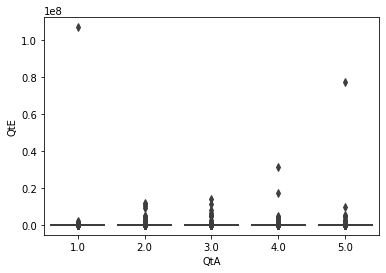

In [ ]:
for col in what:
  sns.boxplot(train[col+"A"],train[col+"E"])

In [ ]:
train[(train['QtA']==1)&(train['QtE']>700000)] # 이상치

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
29277,29277,2.0,990,1.0,1010,2.0,614,1.0,736,1.0,552,2.0,1495,5.0,1223,1.0,1259,5.0,555,1.0,656,5.0,652,5.0,584,3.0,503,4.0,387,4.0,2469,2.0,1647,4.0,362,5.0,560,1.0,409,1.0,750037,30s,2,1,2,Male,1,2,White,Atheist,0,4,1,5,1,4,0,5,0,5,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1


In [ ]:
train[(train['QtA']==5)&(train['QtE']>1600000)] # 이상치

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
20460,20460,1.0,312,5.0,1520,5.0,662,1.0,2165,2.0,1603,1.0,607,1.0,645,2.0,1711,5.0,1715,4.0,1013,4.0,1316,5.0,976,4.0,544,1.0,756,4.0,633,5.0,997,3.0,550,2.0,995,5.0,1003,5.0,1619415,10s,2,1,1,Female,1,1,White,Christian_Catholic,2,0,5,0,6,5,0,2,6,2,1,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1


In [ ]:
train[train['familysize']>99]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
379,379,1.0,43,1.0,40,1.0,41,1.0,40,1.0,40,1.0,36,1.0,5248,1.0,41,1.0,36,1.0,35,4.0,519,1.0,3096,1.0,44,1.0,40,1.0,37,1.0,40,2.0,6605,2.0,1488,1.0,40,1.0,41,10s,2,1,999,Male,1,1,Arab,Christian_Other,4,4,3,1,4,5,1,2,2,6,2,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1
24598,24598,2.0,1292,4.0,1212,3.0,1507,3.0,1254,4.0,3801,3.0,3183,4.0,1524,2.0,4560,4.0,2991,3.0,1504,4.0,2085,4.0,2522,4.0,1368,3.0,5020,3.0,1089,1.0,907,3.0,656,2.0,1120,2.0,1314,3.0,1985,10s,2,1,2147483647,Male,1,1,Other,Other,3,3,1,4,3,2,2,3,2,2,1,2,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,0
25661,25661,1.0,27,3.0,109,2.0,2611,2.0,27,2.0,1384,4.0,2421,3.0,28,1.0,30,1.0,6637,5.0,33,4.0,8155,2.0,56,2.0,348,2.0,31,5.0,149,5.0,116,4.0,33,2.0,1243,4.0,3727,2.0,26,+70s,2,1,100,Male,3,3,Other,Other,5,5,4,5,1,6,0,1,2,4,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0


In [ ]:
train = train[train['QtA']<700000]
test = test[test['QtA']<700000]
train = train[train['QtE']<1600000]
test = test[test['QtE']<1600000]

In [ ]:
test[test['familysize']>99]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13


In [ ]:
# familysize가 너무 큰 3개 항목 제거
train = train[train["familysize"]<100]
test = test[test["familysize"]<100]

In [ ]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA','QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
            
for col in train[Answers]:
    print(sorted(train[col].unique()))

flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    train[flip] = 6 - train[flip]

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    train[flip] = 6 - train[flip]

train['Mach_score'] = train[Answers].mean(axis = 1)
train.head()

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1.90
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.35
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.00


In [ ]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
            
for col in test[Answers]:
    print(sorted(test[col].unique()))

flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    test[flip] = 6 - test[flip]

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    test[flip] = 6 - test[flip]

test['Mach_score'] = test[Answers].mean(axis = 1)
test.head()

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
0,0,3.0,736,2.0,2941,3.0,4621,5.0,4857,4.0,2550,2.0,3171,1.0,3613,2.0,1494,2.0,1597,2.0,8891,1.0,2416,3.0,2043,3.0,3445,1.0,1232,3.0,1152,4.0,1447,3.0,798,2.0,1054,1.0,3462,2.0,1621,10s,2,2,3,Male,1,1,White,Christian_Protestant,2,1,1,4,1,2,2,3,4,4,2,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,2.45
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,2.0,1150,5.0,605,4.0,601,1.0,2370,1.0,2268,3.0,1759,1.0,771,5.0,1124,3.0,4525,5.0,559,2.0,988,3.0,1014,2.0,380,1.0,995,3.0,629,4.0,708,10s,2,2,2,Male,2,1,Other,Christian_Catholic,7,7,7,7,7,7,7,7,7,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.80
2,2,3.0,500,2.0,2507,4.0,480,4.0,614,4.0,1326,4.0,767,5.0,799,1.0,1309,4.0,3317,4.0,766,2.0,1940,5.0,926,4.0,568,4.0,608,5.0,669,3.0,2417,3.0,710,2.0,2781,3.0,1110,5.0,1073,30s,3,2,7,Male,1,2,Other,Christian_Other,6,2,3,0,6,1,2,2,4,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,3.55
3,3,5.0,669,1.0,1050,5.0,1435,4.0,2252,1.0,2533,5.0,578,5.0,742,1.0,2886,5.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,5.0,412,2.0,1076,4.0,1445,1.0,1069,5.0,847,4.0,1126,1.0,1240,60s,4,1,4,Male,1,2,White,Christian_Catholic,0,5,1,6,0,6,0,5,1,6,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,3.35
4,4,4.0,499,1.0,1243,5.0,845,4.0,1666,4.0,925,4.0,413,1.0,361,1.0,995,4.0,1427,3.0,1093,1.0,1201,4.0,1264,2.0,943,2.0,475,2.0,787,4.0,607,3.0,529,2.0,947,4.0,524,3.0,1945,10s,2,1,3,Male,1,1,White,Agnostic,6,1,2,2,3,0,5,2,4,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,2.90


In [ ]:
#train ['new_columns'] = train.groupby(["race","religion"]).mean()['education']

In [ ]:
#편차법을 사용한 양수/음수 분류
#print(train["QaE"][0] - (train["QaE"]).mean())
#print(train["QaE"][2] - (train["QaE"]).mean())

In [ ]:
#(train["QaE"][0]-(train["QaE"].mean()))

In [ ]:

CE = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE',
       'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']
CA = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
# 편차법 사용 - 양수/음수 분류
for col in CE:
  train['distance_',col] = train[col]-(train[col].mean()) >0
  test['distance_',col] = test[col]-(test[col].mean()) >0

In [ ]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,...,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score,"(distance_, QaE)","(distance_, QbE)","(distance_, QcE)","(distance_, QdE)","(distance_, QeE)","(distance_, QfE)","(distance_, QgE)","(distance_, QhE)","(distance_, QiE)","(distance_, QjE)","(distance_, QkE)","(distance_, QlE)","(distance_, QmE)","(distance_, QnE)","(distance_, QoE)","(distance_, QpE)","(distance_, QqE)","(distance_, QrE)","(distance_, QsE)","(distance_, QtE)"
0,0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,...,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,...,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60,False,False,True,True,True,True,False,False,False,False,True,True,True,True,False,True,True,True,True,False
2,2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,...,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1.90,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,...,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.35,False,True,False,True,False,False,False,False,False,True,True,False,True,True,False,True,False,True,True,False
4,4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,...,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,602,5.0,267,5.0,315,1.0,483,5.0,1016,4.0,278,2.0,611,5.0,215,4.0,388,5.0,299,2.0,1915,4.0,439,4.0,823,5.0,309,5.0,586,4.0,...,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,4.15,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
45528,45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,1680,4.0,560,4.0,640,1.0,1415,4.0,4494,5.0,1392,4.0,2478,5.0,1268,3.0,843,4.0,1401,4.0,1524,4.0,719,4.0,754,3.0,1118,4.0,654,4.0,...,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,3.80,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False
45529,45529,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,1690,2.0,1253,1.0,1094,1.0,1283,1.0,2209,1.0,1764,1.0,1062,5.0,1489,1.0,1908,2.0,891,1.0,1298,1.0,1200,1.0,473,1.0,1779,3.0,1355,1.0,...,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1.50,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45530,45530,5.0,747,3.0,1331,4.0,892,4.0,1281,5.0,1328,5.0,599,5.0,650,1.0,1429,1.0,1748,1.0,770,1.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,2.0,1301,2.0,1680,4.0,737,1.0,...,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1,2.90,False,False,False,False,False,False,False,False,False,False,False,False,True,False

In [ ]:
#train.columns[train.columns.str.contains("tp")]

In [ ]:
# tp컬럼들은 심리학의 이유로 값이 7인것을 결측치 처리

nanss = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09',
       'tp10']

#for nans in nanss:
train = train.replace(to_replace = 7, value = np.nan)
#train =train.dropna(axis=0, how = 'any')
#train.interpolate(method = "linear",limit_direction = "forward")
train = train.fillna(method = 'bfill')
#for nans in nanss:
test = test.replace(to_replace = 7, value = np.nan)
#test = test.dropna(axis=0, how = 'any')
#test.interpolate(method = "linear",limit_direction = "forward")
test = test.fillna(method = 'bfill')

In [ ]:
# 로그 스케일링
"""
import numpy as np

for col in train.columns:
  if train[col].dtype != "object":
    train[col] = train[col]+min(train[col])+0.01
    train[col] = np.log1p(train[col])
    print(train[col])
    """

'\nimport numpy as np\n\nfor col in train.columns:\n  if train[col].dtype != "object":\n    train[col] = train[col]+min(train[col])+0.01\n    train[col] = np.log1p(train[col])\n    print(train[col])\n    '

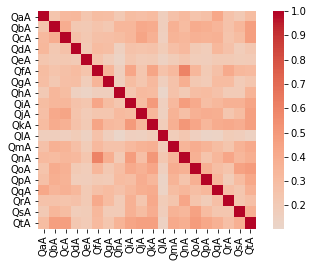

In [ ]:
correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

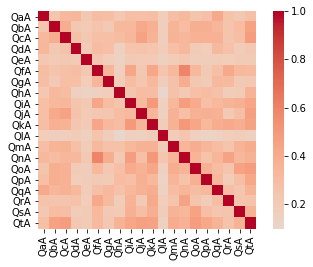

In [ ]:
correlations = test[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [ ]:
#train.drop('QlA',axis=1)
#train.drop('QlE',axis=1)
#test.drop('QlA',axis=1)
#test.drop('QlE',axis=1)
#train.drop('QeA',axis=1)
#train.drop('QeE',axis=1)
#test.drop('QeA',axis=1)
#test.drop('QeE',axis=1)

In [ ]:
train.columns

Index([             'index',                'QaA',                'QaE',
                      'QbA',                'QbE',                'QcA',
                      'QcE',                'QdA',                'QdE',
                      'QeA',                'QeE',                'QfA',
                      'QfE',                'QgA',                'QgE',
                      'QhA',                'QhE',                'QiA',
                      'QiE',                'QjA',                'QjE',
                      'QkA',                'QkE',                'QlA',
                      'QlE',                'QmA',                'QmE',
                      'QnA',                'QnE',                'QoA',
                      'QoE',                'QpA',                'QpE',
                      'QqA',                'QqE',                'QrA',
                      'QrE',                'QsA',                'QsE',
                      'QtA',                'QtE', 

In [ ]:
#one-hot-encoding 원핫인코딩

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["age_group","race","religion"]
train = dummy_data(train, dummy_columns)
test = dummy_data(test, dummy_columns)


In [ ]:
# LabelEncoder 라벨링
for col in train.columns:
  if train[col].dtype == "object":
    label = LabelEncoder()
    train[col] = label.fit_transform(train[col])

for col in test.columns:
  if test[col].dtype == "object":
    label = LabelEncoder()
    test[col] = label.fit_transform(test[col])

In [ ]:
train_y = train['voted']

In [ ]:
train = train.drop('voted',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(train,train_y,test_size=0.2,shuffle=True,stratify=train_y,random_state=42)

# 모델 예측하기

In [ ]:
pip install catboost

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [ ]:
LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#스케일링
"""
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
minmaxscaler = MinMaxScaler()
print(minmaxscaler.fit(x_train))
x_train_scale = minmaxscaler.fit_transform(x_train)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import RobustScaler\nfrom sklearn.preprocessing import MaxAbsScaler\nfrom sklearn.preprocessing import StandardScaler\nminmaxscaler = MinMaxScaler()\nprint(minmaxscaler.fit(x_train))\nx_train_scale = minmaxscaler.fit_transform(x_train)\n'

In [ ]:
# CATBOOST
cat_params_list=[]

for _ in range(50):
    params = {'n_estimators' : np.random.randint(low=100, high=1000), 
             'subsample' : np.random.uniform(low=0.5, high=1),
             'reg_lambda' : np.random.uniform(low=0, high=30),
             'learning_rate' : np.random.uniform(low=0.01, high=0.3),
              'depth' : np.random.randint(low=3, high=11),
             }
    cat_params_list.append(params)

model = CatBoostClassifier(bootstrap_type='Bernoulli', eval_metric='AUC', verbose=False, random_seed=18, **params , early_stopping_rounds=50)
model.fit(x_train,y_train,verbose=True,eval_set=[(x_train,y_train),(x_valid,y_valid)])

0:	test: 0.7205450	test1: 0.7272153	best: 0.7272153 (0)	total: 24.9ms	remaining: 6.5s
1:	test: 0.7449968	test1: 0.7480237	best: 0.7480237 (1)	total: 49.9ms	remaining: 6.49s
2:	test: 0.7514974	test1: 0.7538658	best: 0.7538658 (2)	total: 75.5ms	remaining: 6.52s
3:	test: 0.7530517	test1: 0.7538804	best: 0.7538804 (3)	total: 98.7ms	remaining: 6.37s
4:	test: 0.7552076	test1: 0.7557329	best: 0.7557329 (4)	total: 123ms	remaining: 6.33s
5:	test: 0.7566762	test1: 0.7571947	best: 0.7571947 (5)	total: 146ms	remaining: 6.25s
6:	test: 0.7584839	test1: 0.7584782	best: 0.7584782 (6)	total: 170ms	remaining: 6.2s
7:	test: 0.7596266	test1: 0.7591719	best: 0.7591719 (7)	total: 193ms	remaining: 6.13s
8:	test: 0.7601785	test1: 0.7593999	best: 0.7593999 (8)	total: 216ms	remaining: 6.06s
9:	test: 0.7618813	test1: 0.7601291	best: 0.7601291 (9)	total: 245ms	remaining: 6.18s
10:	test: 0.7628887	test1: 0.7604584	best: 0.7604584 (10)	total: 269ms	remaining: 6.14s
11:	test: 0.7636444	test1: 0.7607710	best: 0.76077

In [ ]:
"""
# LGBM 

lgb_params_list=[]
for _ in range(50):
    params = {'n_estimators' : np.random.randint(low=100, high=1000), 
             'colsample_bytree' : np.random.uniform(low=0.5, high=1), 
             'subsample' : np.random.uniform(low=0.5, high=1), 
             'reg_alpha' : np.random.uniform(low=0, high=30), 
             'reg_lambda' : np.random.uniform(low=0, high=30),
             'learning_rate' : np.random.uniform(low=0.01, high=0.3), 
             'drop_rate' : np.random.uniform(low=0.3, high=0.8),
             'uniform_drop' : np.random.choice([True, False]),
              'num_leaves' : np.random.randint(low=7, high=128)
             }
    lgb_params_list.append(params)
lgbm =  LGBMClassifier(boosting = 'dart', boosting_type='Bernoulli', subsample_freq=1,random_state=18, max_drop=-1,**params)

lgbm = LGBMClassifier(boosting='dart', boosting_type='dart', class_weight=None,
               colsample_bytree=0.8, importance_type='split', learning_rate=0.01,
               max_depth=21, min_child_samples=31, min_child_weight=0.003,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1,
               num_iterations=150, num_leaves=128, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.8, subsample_for_bin=100000, subsample_freq=0)


lgbm.fit(x_train_scale,y_train,verbose=True,eval_set=[(x_train,y_train),(x_valid,y_valid)],eval_metric='AUC')
"""

"\n# LGBM \n\nlgb_params_list=[]\nfor _ in range(50):\n    params = {'n_estimators' : np.random.randint(low=100, high=1000), \n             'colsample_bytree' : np.random.uniform(low=0.5, high=1), \n             'subsample' : np.random.uniform(low=0.5, high=1), \n             'reg_alpha' : np.random.uniform(low=0, high=30), \n             'reg_lambda' : np.random.uniform(low=0, high=30),\n             'learning_rate' : np.random.uniform(low=0.01, high=0.3), \n             'drop_rate' : np.random.uniform(low=0.3, high=0.8),\n             'uniform_drop' : np.random.choice([True, False]),\n              'num_leaves' : np.random.randint(low=7, high=128)\n             }\n    lgb_params_list.append(params)\nlgbm =  LGBMClassifier(boosting = 'dart', boosting_type='Bernoulli', subsample_freq=1,random_state=18, max_drop=-1,**params)\n\nlgbm = LGBMClassifier(boosting='dart', boosting_type='dart', class_weight=None,\n               colsample_bytree=0.8, importance_type='split', learning_rate=0.01

In [ ]:
"""
from sklearn.ensemble import VotingClassifier
# model, lgbm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
log_clf = LogisticRegression(solver = 'liblinear', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma='auto',random_state=42)

voting_clf = VotingClassifier(estimators = [("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)], voting = 'soft')
voting_clf.fit(x_train,y_train)
"""

'\nfrom sklearn.ensemble import VotingClassifier\n# model, lgbm\nfrom sklearn.svm import SVC\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nlog_clf = LogisticRegression(solver = \'liblinear\', random_state=42)\nrnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)\nsvm_clf = SVC(gamma=\'auto\',random_state=42)\n\nvoting_clf = VotingClassifier(estimators = [("lr",log_clf),("rf",rnd_clf),("svc",svm_clf)], voting = \'soft\')\nvoting_clf.fit(x_train,y_train)\n'

In [ ]:
# Cross validation 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,x_train , y_train , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

cross_val_score_mean_score = np.mean(scores)
print("평균 정확도: {0:.4f}".format(cross_val_score_mean_score))

교차 검증 0 정확도: 0.6753
교차 검증 1 정확도: 0.6848
교차 검증 2 정확도: 0.6884
교차 검증 3 정확도: 0.6936
교차 검증 4 정확도: 0.6882
평균 정확도: 0.6861


In [ ]:
"""
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#Kfold 교차검증
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(x_train)):
        X_train, X_test = x_train.values[train_index], x_train.values[test_index]
        Y_train, Y_test = y_train.values[train_index], y_train.values[test_index]
        
        clf.fit(X_train, Y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(model , folds=5)
"""

'\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import accuracy_score\n\n#Kfold 교차검증\ndef exec_kfold(clf, folds=5):\n    kfold = KFold(n_splits=folds)\n    scores = []\n    \n    for iter_count , (train_index, test_index) in enumerate(kfold.split(x_train)):\n        X_train, X_test = x_train.values[train_index], x_train.values[test_index]\n        Y_train, Y_test = y_train.values[train_index], y_train.values[test_index]\n        \n        clf.fit(X_train, Y_train) \n        predictions = clf.predict(X_test)\n        accuracy = accuracy_score(Y_test, predictions)\n        scores.append(accuracy)\n        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     \n    \n    mean_score = np.mean(scores)\n    print("평균 정확도: {0:.4f}".format(mean_score))\n\nexec_kfold(model , folds=5)\n'

- baseline : 0.765999252644209 (Baseline)

1. lgbm : 0.7648301884221325

2. lgbm 파라미터 조정 & kfold : 0.7698745052921331

3. one-hot-encoding : 0.7688198260808625

4. 원핫인코딩(x) kfold(x)- 0.7709460722190751

5. lgbm - 0.7726923204208009

6. kfold & lgbm - 0.7710992783543287

7. catboost & 전처리 추가 - 0.7731106199 (Best) , 0.7729399907

8. crossvalidation & onehotencoding & catboost - 0.7735516958770614

In [ ]:
lgbm_pred = model.predict_proba(x_valid)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,lgbm_pred[:,1])

0.7650805219050405

In [ ]:
print(train.shape)
print(test.shape)

(45525, 121)
(11383, 121)


# Feature importance

In [ ]:
#fig,ax = plt.subplots(figsize = (20,15))
#plot_importance(model,ax=ax)

In [ ]:
submission['voted']=model.predict_proba(test)[:,1] # 결과는 확률값
submission

,index,voted
0,0,0.502201
1,1,0.546055
2,2,0.530829
3,3,0.454918
4,4,0.503510
...,...,...
11378,11378,0.534823
11379,11379,0.606898
11380,11380,0.476101
11381,11381,0.484162


In [ ]:
# sub["target"] = (sub_lgb["target"] * 0.5 + sub_xgb["target"] * 0.3 + sub_cat["target"] * 0.2)

In [ ]:
submission.to_csv('prob_submissionk_rnd.csv',index=False)